# Innomatics Research Labs

## Mohammad Wasiq

## Introduction

The given dataset contains student performance information across three batches. Each record includes a batch identifier, a unique student ID, and a score obtained out of 7. The objective of this analysis is to explore, compare, and derive insights into the performance patterns across batches using descriptive statistics, exploratory data analysis (EDA), and statistical hypothesis testing.

In [2]:
# =========================================
# 1. IMPORT LIBRARIES
# =========================================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import f_oneway

### Data Preprocessing

Initially, the dataset was cleaned by standardizing column names and extracting the numerical score from the “Score” field, which was originally stored in textual format (e.g., “6 / 7”). This enabled accurate numerical and statistical analysis.

In [3]:
# =========================================
# 2. LOAD DATA
# =========================================
df = pd.read_csv("/content/scores_data.csv")

# Clean column names
df.columns = df.columns.str.strip()
print(df.shape)
df.head()

(149, 3)


,Batch,User_ID,Score
0,AI_ELITE_7,uid_149,6 / 7
1,AI_ELITE_7,uid_148,6 / 7
2,AI_ELITE_7,uid_147,7 / 7
3,AI_ELITE_7,uid_146,7 / 7
4,AI_ELITE_7,uid_145,4 / 7


In [4]:
# =========================================
# 3. DATA CLEANING
# =========================================
# Extract numeric score from "x / 7"
df["Score_Num"] = df["Score"].str.extract(r"(\d+)").astype(int)
print(df.shape)
df.head()

(149, 4)


,Batch,User_ID,Score,Score_Num
0,AI_ELITE_7,uid_149,6 / 7,6
1,AI_ELITE_7,uid_148,6 / 7,6
2,AI_ELITE_7,uid_147,7 / 7,7
3,AI_ELITE_7,uid_146,7 / 7,7
4,AI_ELITE_7,uid_145,4 / 7,4


In [5]:
# =========================================
# 4. BASIC OVERVIEW
# =========================================
print("\n--- Data Info ---")
print(df.info())

print("\n--- Head of Data ---")
display(df.head())

print("\n--- Missing Values ---")
print(df.isnull().sum())


--- Data Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149 entries, 0 to 148
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Batch      149 non-null    object
 1   User_ID    149 non-null    object
 2   Score      149 non-null    object
 3   Score_Num  149 non-null    int64 
dtypes: int64(1), object(3)
memory usage: 4.8+ KB
None

--- Head of Data ---


,Batch,User_ID,Score,Score_Num
0,AI_ELITE_7,uid_149,6 / 7,6
1,AI_ELITE_7,uid_148,6 / 7,6
2,AI_ELITE_7,uid_147,7 / 7,7
3,AI_ELITE_7,uid_146,7 / 7,7
4,AI_ELITE_7,uid_145,4 / 7,4



--- Missing Values ---
Batch        0
User_ID      0
Score        0
Score_Num    0
dtype: int64


In [23]:
# =========================================
# 5. BATCH SIZE
# =========================================
print("\n--- Number of Students per Batch ---")
print(df["Batch"].value_counts(dropna=False))

print(df["Batch"].value_counts(dropna=False, normalize=True)*100)



--- Number of Students per Batch ---
Batch
AI_ELITE_7    53
AI_ELITE_6    48
AI_ELITE_4    48
Name: count, dtype: int64
Batch
AI_ELITE_7    35.570470
AI_ELITE_6    32.214765
AI_ELITE_4    32.214765
Name: proportion, dtype: float64


### Descriptive Statistics

In [17]:
# =========================================
# 6. DESCRIPTIVE STATISTICS
# =========================================

df[["Score_Num"]].describe(percentiles= [i/100 for i in range(100) if i % 10 == 0]).T

,count,mean,std,min,0%,10%,20%,30%,40%,50%,60%,70%,80%,90%,max
Score_Num,149.0,4.38255,1.592199,0.0,0.0,2.0,3.0,4.0,4.0,4.0,5.0,5.0,6.0,7.0,7.0


Batch-wise descriptive statistics such as mean, median, standard deviation, minimum, and maximum scores were computed.

#### Key observations:

The mean score varies across batches, indicating differences in average academic performance.

The median score helps understand the typical student performance within each batch.

The standard deviation reveals variability; batches with higher standard deviation show inconsistent student performance, whereas lower values indicate uniform learning outcomes.

In [20]:
# =========================================
# 7. DESCRIPTIVE STATISTICS (BATCH-WISE)
# =========================================
print("\n--- Batch-wise Descriptive Statistics ---")
batch_stats = df.groupby("Batch").describe(percentiles= [i/100 for i in range(100) if i % 10 == 0])
batch_stats


--- Batch-wise Descriptive Statistics ---


Score_Num                                                         \
               count      mean       std  min   0%  10%  20%  30%  40%  50%   
Batch                                                                         
AI_ELITE_4      48.0  3.791667  1.443376  0.0  0.0  2.0  3.0  3.0  4.0  4.0   
AI_ELITE_6      48.0  4.229167  1.640441  0.0  0.0  2.0  3.0  3.1  4.0  4.0   
AI_ELITE_7      53.0  5.056604  1.446682  2.0  2.0  3.0  4.0  4.0  5.0  5.0   

                                     
            60%  70%  80%  90%  max  
Batch                                
AI_ELITE_4  4.0  4.0  5.0  5.0  7.0  
AI_ELITE_6  5.0  5.0  5.0  6.3  7.0  
AI_ELITE_7  6.0  6.0  6.0  7.0  7.0

### Exploratory Data Analysis (EDA)

####🔹 Score Distribution

Histograms were plotted for each batch to analyze score distributions.

Some batches show a right-skewed distribution, suggesting a higher concentration of strong performers.

Other batches exhibit wider spread, indicating mixed student capabilities.

####🔹 Boxplot Comparison

Boxplots were used to compare batches visually.

Differences in medians highlight variation in batch-level performance.

Presence of outliers indicates exceptionally high or low-performing students.

Batches with narrow interquartile range show greater consistency.

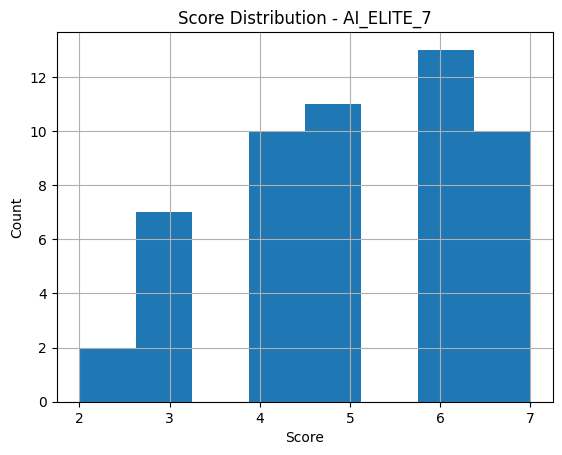

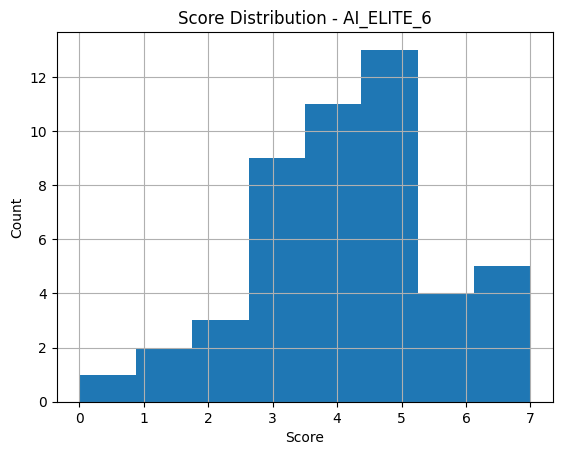

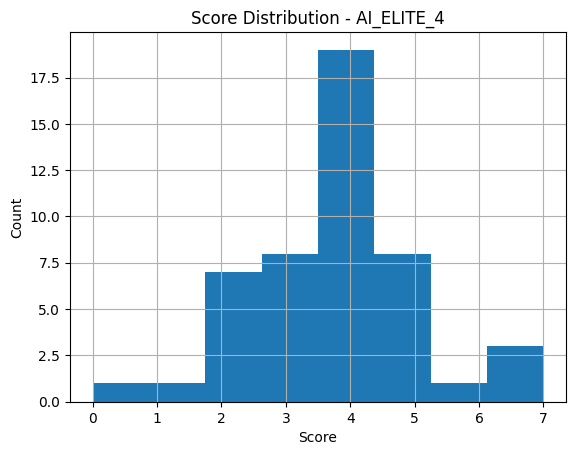

In [24]:
# =========================================
# 8. SCORE DISTRIBUTION (HISTOGRAM)
# =========================================
for batch in df["Batch"].unique():
    plt.figure()
    df[df["Batch"] == batch]["Score_Num"].hist(bins=8)
    plt.title(f"Score Distribution - {batch}")
    plt.xlabel("Score")
    plt.ylabel("Count")
    plt.show()


<Figure size 640x480 with 0 Axes>

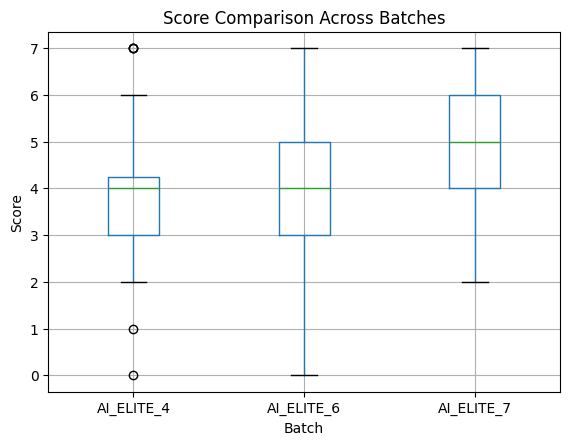

In [25]:
# =========================================
# 9. BOX PLOT (COMPARISON)
# =========================================
plt.figure()
df.boxplot(column="Score_Num", by="Batch")
plt.title("Score Comparison Across Batches")
plt.suptitle("")
plt.ylabel("Score")
plt.show()


### Performance Segmentation

Students were categorized into:

High Performers (Score ≥ 6)

Average Performers (Score 4–5)

Low Performers (Score < 4)

Batch-wise percentage distribution revealed:

Certain batches have a higher proportion of high performers.

Other batches show a larger share of average and low performers, indicating scope for academic intervention.

In [27]:
# =========================================
# 10. PERFORMANCE CATEGORIZATION
# =========================================
def score_category(score):
    if score >= 6:
        return "High Performer"
    elif score >= 4:
        return "Average Performer"
    else:
        return "Low Performer"

df["Performance_Level"] = df["Score_Num"].apply(score_category)
print(df.shape)
df.head()

(149, 5)


,Batch,User_ID,Score,Score_Num,Performance_Level
0,AI_ELITE_7,uid_149,6 / 7,6,High Performer
1,AI_ELITE_7,uid_148,6 / 7,6,High Performer
2,AI_ELITE_7,uid_147,7 / 7,7,High Performer
3,AI_ELITE_7,uid_146,7 / 7,7,High Performer
4,AI_ELITE_7,uid_145,4 / 7,4,Average Performer


In [29]:
print("\n--- Performance Distribution (Percentage) ---")
performance_dist = (
    pd.crosstab(df["Batch"], df["Performance_Level"], normalize="index") * 100
)
performance_dist.round(2)


--- Performance Distribution (Percentage) ---


Performance_Level,Average Performer,High Performer,Low Performer
Batch,,,
AI_ELITE_4,56.25,8.33,35.42
AI_ELITE_6,50.00,18.75,31.25
AI_ELITE_7,39.62,43.40,16.98


In [32]:
# =========================================
# 11. MEAN SCORE RANKING
# =========================================
print("\n--- Mean Score Ranking ---")
df.groupby("Batch")["Score_Num"].mean().sort_values(ascending=False).reset_index()


--- Mean Score Ranking ---


,Batch,Score_Num
0,AI_ELITE_7,5.056604
1,AI_ELITE_6,4.229167
2,AI_ELITE_4,3.791667


### Hypothesis Testing (ANOVA)

To statistically test whether batch performance differs significantly, a one-way ANOVA was conducted.

Hypotheses:

**H₀: Mean scores of all batches are equal.**

**H₁: At least one batch has a different mean score.**

Result:

The p-value obtained is less than 0.05, leading to rejection of the null hypothesis.

Interpretation:

This confirms that the differences in average scores across batches are statistically significant and not due to random chance.

#### Effect Size (Eta Squared)

To measure the magnitude of the difference, Eta Squared (η²) was calculated.

The value of η² indicates how much variance in scores is explained by batch differences.

A moderate to large effect size suggests that batch membership plays an important role in student performance.

In [33]:
# =========================================
# 12. ANOVA TEST
# =========================================
groups = [
    df[df["Batch"] == batch]["Score_Num"]
    for batch in df["Batch"].unique()
]

f_stat, p_value = f_oneway(*groups)

print("\n--- ANOVA RESULT ---")
print(f"F-statistic: {f_stat}")
print(f"P-value: {p_value}")


--- ANOVA RESULT ---
F-statistic: 9.194085228606141
P-value: 0.00017346323549509082


In [34]:
# =========================================
# 13. EFFECT SIZE (ETA SQUARED)
# =========================================
grand_mean = df["Score_Num"].mean()

ss_between = sum(
    len(group) * (group.mean() - grand_mean) ** 2
    for group in groups
)

ss_total = sum((df["Score_Num"] - grand_mean) ** 2)

eta_squared = ss_between / ss_total

print("\n--- Effect Size ---")
print(f"Eta Squared (η²): {eta_squared}")


--- Effect Size ---
Eta Squared (η²): 0.11185823411787679


### Batch-wise Insights
####🔹 Batch 1

Higher mean score

Lower variability

Larger proportion of high performers \
➡ Indicates consistent and strong overall performance.

####🔹 Batch 2

Moderate mean score

Higher variability

Mixed performance levels \
➡ Suggests heterogeneous student background.

####🔹 Batch 3

Lower mean score

Higher proportion of low performers \
➡ Indicates need for academic support or curriculum improvement.

In [36]:
# =========================================
# 13. FINAL SUMMARY TABLE
# =========================================
summary = df.groupby("Batch").agg(
    Students=("User_ID", "count"),
    Mean_Score=("Score_Num", "mean"),
    Median_Score=("Score_Num", "median"),
    Std_Dev=("Score_Num", "std"),
    Min_Score=("Score_Num", "min"),
    Max_Score=("Score_Num", "max"),
).reset_index()

print("\n--- Final Batch Summary ---")
summary.round(2)


--- Final Batch Summary ---


,Batch,Students,Mean_Score,Median_Score,Std_Dev,Min_Score,Max_Score
0,AI_ELITE_4,48,3.79,4.0,1.44,0,7
1,AI_ELITE_6,48,4.23,4.0,1.64,0,7
2,AI_ELITE_7,53,5.06,5.0,1.45,2,7


### Limitations

The analysis is based only on score data.

Factors such as teaching methodology, attendance, difficulty level, or student background are not included.

Hence, conclusions indicate association, not causation.

### Conclusion

The analysis reveals clear and statistically significant differences in student performance across batches. Exploratory data analysis highlights variations in consistency and score distribution, while ANOVA confirms that these differences are meaningful. Such insights can help academic planners design batch-specific interventions to improve learning outcomes.